In [1]:
%pip install flask

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install onnxruntime

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install numpy opencv-python matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install requests tqdm

Note: you may need to restart the kernel to use updated packages.


In [5]:
import onnxruntime as rt
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
import random
import requests
from tqdm import tqdm
import shutil

In [6]:
def download_file(url, save):

    re = requests.get(url, stream=True)

    file_size = int(re.headers.get('Content-Length', 0))
    with tqdm.wrapattr(re.raw, "read", total=file_size) as r:
        with open(save, 'wb') as f:
            shutil.copyfileobj(r, f)

In [7]:
# download_file('https://models.arz.ai/ocr_v2.onnx', './model.onnx')
# download_file('https://models.arz.ai/ocr_v2.json', './keys.json')

100%|██████████| 146M/146M [00:09<00:00, 16.0MB/s] 
100%|██████████| 745/745 [00:00<00:00, 1.97MB/s]


In [8]:
providers = ['CPUExecutionProvider']
model = rt.InferenceSession('./model.onnx', providers=providers)
output_name = model.get_outputs()[0].name
input_name = model.get_inputs()[0].name

In [9]:
ltx_index = json.load((open('keys.json')))

In [10]:
data = json.load(open('ocr-data/batch_1/JSON/kaggle_data_1.json'))

In [11]:
def resize(img, w=256, h=256):
    p = max(img.shape[:2] / np.array([h, w]))
    s = img.shape[:2]
    r = s / p
    
    img = cv2.resize(img, (int(r[1]), int(r[0])))

    re = np.zeros((h, w, 3))
    offset = np.array((np.array(re.shape[:2]) - np.array(img.shape[:2])) / 2, dtype=np.int32)
    re[offset[0]:offset[0] + img.shape[0], offset[1]:offset[1] + img.shape[1]] = img
    return re

def load(image_file, w, h):
    i = cv2.imread(image_file)[...,::-1]
    input_image = resize(i, w, h) / 255
    return input_image[None].astype(np.float32)

In [12]:
idx = random.choice(data)
print(idx['filename'])
print(idx['latex'])

8f97fc0b-5821-4eab-81b5-a69c713b4e0e.jpg
\lim_{x\to\frac{\pi}{7}}\frac{\sin^{2}{x}+\csc^{8}{x}}{6}


\lim_{x\to\frac{\pi}{3}}\frac{5\sin{x}+-3\csc{x}}{9x+-9\frac{\pi}{3}}                                                                          
\lim_{x\to\frac{\pi}{3}}\frac{5\sin{x}+-3\csc{x}}{9x+-9\frac{\pi}{3}}


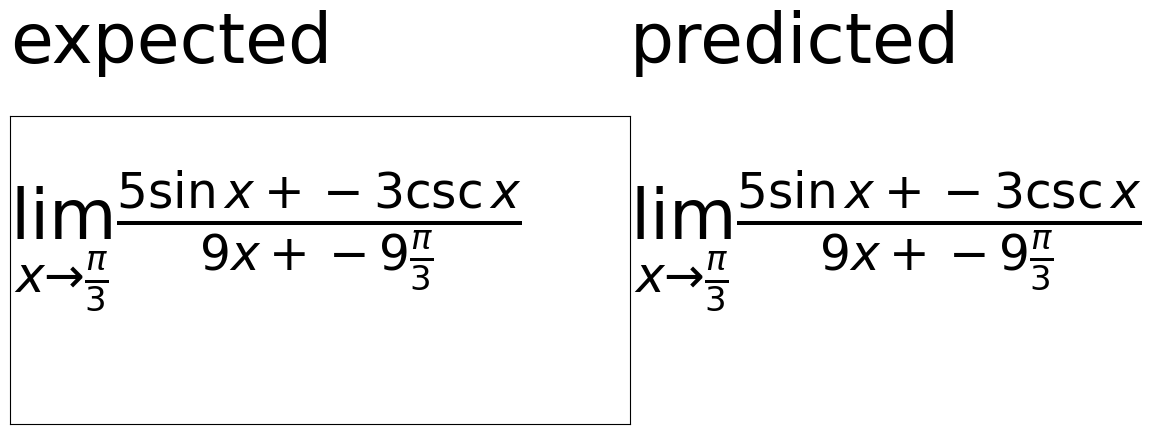

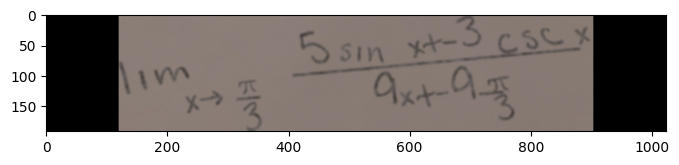

In [28]:
idx = random.choice(data)
img = load('ocr-data/batch_1/background_images/'+idx['filename'], w=1024, h=192)
res = model.run([output_name], {input_name: img})[0][0]
res = np.argmax(res, axis=1)

l = ''.join([ltx_index[str(x - 1)] if x != 0 else ' ' for x in res])
e = idx['latex']

print(l)
print(e)

plt.figure(figsize=(8, 4))
plt.text(0, 0.6, 'expected\n\n' + r"$%s$" % e, fontsize=50)
plt.text(1, 0.6, 'predicted\n\n' + r"$%s$" % l, fontsize=50)

fig = plt.gca()
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

im = img[0]

plt.figure(figsize=(8, 8))
plt.imshow(im)

In [31]:
print(res)

[array([[[2.3290633e-10, 9.9999702e-01, 4.9540461e-07, ...,
         2.3569579e-14, 3.3627391e-08, 9.8388864e-13],
        [3.2035150e-09, 9.0824057e-07, 9.9998093e-01, ...,
         3.3382613e-11, 1.0515962e-13, 6.3226443e-18],
        [3.6253875e-11, 8.2233820e-09, 4.5742831e-07, ...,
         1.0213761e-09, 2.1206163e-14, 8.7350136e-13],
        ...,
        [1.0000000e+00, 7.4036413e-23, 1.2989044e-21, ...,
         1.1736793e-25, 9.8939705e-26, 1.7584684e-27],
        [1.0000000e+00, 1.0591768e-21, 3.5383829e-19, ...,
         8.5558377e-23, 2.9911117e-24, 5.5078771e-25],
        [1.0000000e+00, 7.0804047e-18, 2.1274655e-17, ...,
         2.0399472e-17, 1.3324256e-18, 6.2214131e-19]]], dtype=float32)]


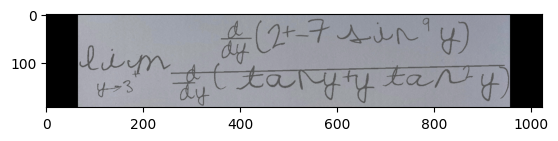

In [18]:
plt.imshow(img[0])

In [29]:
res = model.run([output_name], {input_name: img})

In [30]:
res[0][0].shape

(115, 61)

In [33]:
res = np.argmax(res, axis=1)
res

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])